In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import fields

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


In [55]:
print(250e-9/189e-9,250e-9/780e-9)

1.3227513227513226 0.3205128205128205


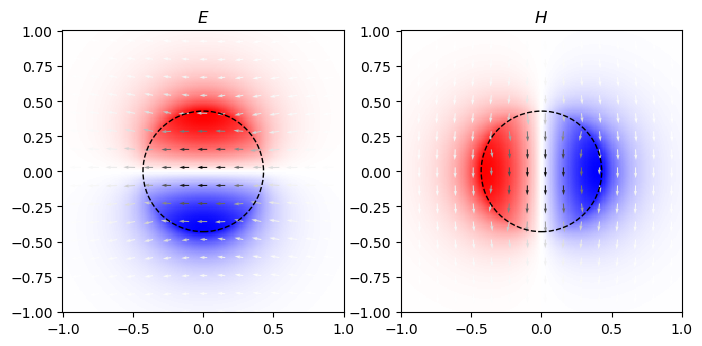

Text(0.5, 1.0, '$\\Im\\{E^*\\cdot(\\nabla)H-H^*\\cdot(\\nabla)E\\}$')

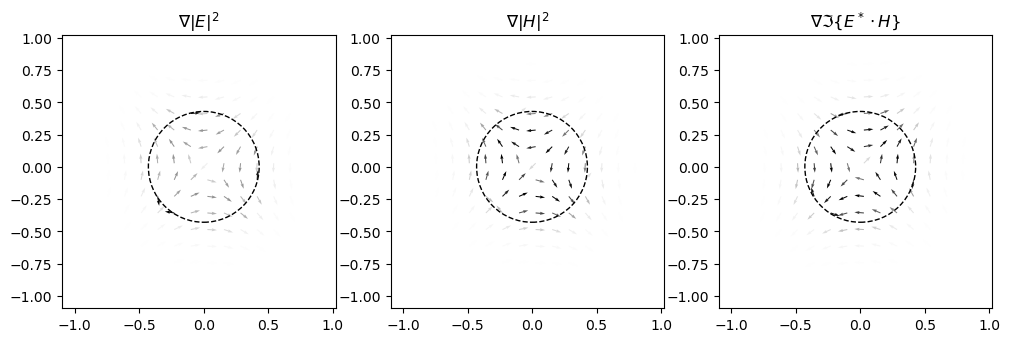

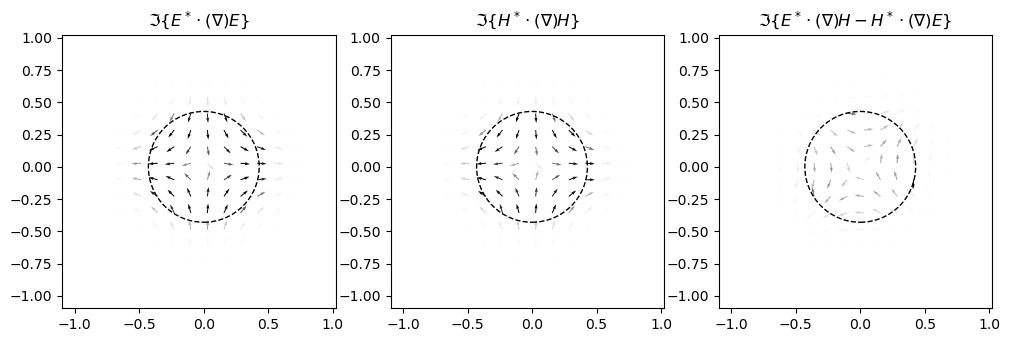

In [67]:
r0=140e-9
λ0=326e-9
m=1
N=250
step=int(N/15)
x=λ0*np.linspace(-m,m,int(N))
y=λ0*np.linspace(-m,m,int(N))
z=0
X, Y = np.meshgrid(x, y)

def em(F):
    return np.sqrt(np.abs(F[0])**2+np.abs(F[1])**2)

E=fields.get_E(X,Y,z,λ0,r0)
H=fields.get_H(X,Y,z,λ0,r0)

fig, ax = plt.subplots(ncols=2,figsize=(8,8))
ax[0].pcolormesh(X/λ0,Y/λ0,np.real(E[2]),cmap='bwr')
ax[0].quiver(X[::step,::step]/λ0,Y[::step,::step]/λ0,np.real(E[0][::step,::step])/em(E)[::step,::step],np.real(E[1][::step,::step])/em(E)[::step,::step],em(E)[::step,::step],cmap='Greys')
circle=plt.Circle((0, 0), r0/λ0, color='black',fill=False,linestyle='--')    
ax[0].add_artist(circle)
ax[0].set_aspect('equal')
ax[0].set_title(r'$E$')

ax[1].pcolormesh(X/λ0,Y/λ0,np.real(H[2]),cmap='bwr')
ax[1].quiver(X[::step,::step]/λ0,Y[::step,::step]/λ0,np.real(H[0][::step,::step])/em(H)[::step,::step],np.real(H[1][::step,::step])/em(H)[::step,::step],em(H)[::step,::step],cmap='Greys')
circle=plt.Circle((0, 0), r0/λ0, color='black',fill=False,linestyle='--')    
ax[1].add_artist(circle)
ax[1].set_aspect('equal')
ax[1].set_title(r'$H$')

plt.show()

dWe=np.gradient(np.conj(E[0])*E[0]+np.conj(E[1])*E[1]+np.conj(E[2])*E[2])
dWm=np.gradient(np.conj(H[0])*H[0]+np.conj(H[1])*H[1]+np.conj(H[2])*H[2])
dWc=np.gradient(np.imag(np.conj(E[0])*H[0]+np.conj(E[1])*H[1]+np.conj(E[2])*H[2]))

fig, ax = plt.subplots(ncols=3,figsize=(12,8))

ax[0].quiver(X[::step,::step]/λ0,Y[::step,::step]/λ0,np.real(dWe[0][::step,::step])/em(dWe)[::step,::step],np.real(dWe[1][::step,::step])/em(dWe)[::step,::step],em(dWe)[::step,::step],cmap='Greys')
circle=plt.Circle((0, 0), r0/λ0, color='black',fill=False,linestyle='--')    
ax[0].add_artist(circle)
ax[0].set_aspect('equal')
ax[0].set_title(r'$\nabla |E|^2$')

ax[1].quiver(X[::step,::step]/λ0,Y[::step,::step]/λ0,np.real(dWm[0][::step,::step])/em(dWm)[::step,::step],np.real(dWm[1][::step,::step])/em(dWm)[::step,::step],em(dWm)[::step,::step],cmap='Greys')
circle=plt.Circle((0, 0), r0/λ0, color='black',fill=False,linestyle='--')    
ax[1].add_artist(circle)
ax[1].set_aspect('equal')
ax[1].set_title(r'$\nabla |H|^2$')

ax[2].quiver(X[::step,::step]/λ0,Y[::step,::step]/λ0,np.real(dWc[0][::step,::step])/em(dWc)[::step,::step],np.real(dWc[1][::step,::step])/em(dWc)[::step,::step],em(dWc)[::step,::step],cmap='Greys')
circle=plt.Circle((0, 0), r0/λ0, color='black',fill=False,linestyle='--')    
ax[2].add_artist(circle)
ax[2].set_aspect('equal')
ax[2].set_title(r'$\nabla \Im\{E^*\cdot H\}$')

pe=np.imag(np.conj(E[0])*np.gradient(E[0])+np.conj(E[1])*np.gradient(E[1])+np.conj(E[2])*np.gradient(E[2]))
pm=np.imag(np.conj(H[0])*np.gradient(H[0])+np.conj(H[1])*np.gradient(H[1])+np.conj(H[2])*np.gradient(H[2]))
pc=np.imag(np.conj(E[0])*np.gradient(H[0])+np.conj(E[1])*np.gradient(H[1])+np.conj(E[2])*np.gradient(H[2])
            -np.conj(H[0])*np.gradient(E[0])+np.conj(H[1])*np.gradient(E[1])+np.conj(H[2])*np.gradient(E[2]))

fig, ax = plt.subplots(ncols=3,figsize=(12,8))

ax[0].quiver(X[::step,::step]/λ0,Y[::step,::step]/λ0,np.real(pe[0][::step,::step])/em(pe)[::step,::step],np.real(pe[1][::step,::step])/em(pe)[::step,::step],em(pe)[::step,::step],cmap='Greys')
circle=plt.Circle((0, 0), r0/λ0, color='black',fill=False,linestyle='--')    
ax[0].add_artist(circle)
ax[0].set_aspect('equal')
ax[0].set_title(r'$\Im\{E^*\cdot(\nabla)E\}$')

ax[1].quiver(X[::step,::step]/λ0,Y[::step,::step]/λ0,np.real(pm[0][::step,::step])/em(pm)[::step,::step],np.real(pm[1][::step,::step])/em(pm)[::step,::step],em(pm)[::step,::step],cmap='Greys')
circle=plt.Circle((0, 0), r0/λ0, color='black',fill=False,linestyle='--')    
ax[1].add_artist(circle)
ax[1].set_aspect('equal')
ax[1].set_title(r'$\Im\{H^*\cdot(\nabla)H\}$')

ax[2].quiver(X[::step,::step]/λ0,Y[::step,::step]/λ0,np.real(pc[0][::step,::step])/em(pc)[::step,::step],np.real(pc[1][::step,::step])/em(pc)[::step,::step],em(pc)[::step,::step],cmap='Greys')
circle=plt.Circle((0, 0), r0/λ0, color='black',fill=False,linestyle='--')    
ax[2].add_artist(circle)
ax[2].set_aspect('equal')
ax[2].set_title(r'$\Im\{E^*\cdot(\nabla)H-H^*\cdot(\nabla)E\}$')



# fig, ax = plt.subplots()
# ax.pcolormesh(X/r0,Y/r0,np.real(E[2]),cmap='bwr')
# ax.quiver(X[::step,::step]/r0,Y[::step,::step]/r0,np.real(E[0][::step,::step])/5,np.real(E[1][::step,::step])/5,units='xy')
# circle=plt.Circle((0, 0), 1, color='black',fill=False,linestyle='--')    
# ax.add_artist(circle)
# ax.set_aspect('equal')
# plt.show()

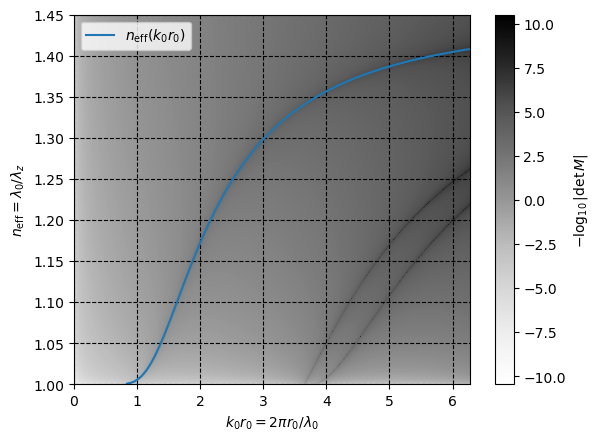

In [5]:
fields.material(n_in=1.45,n_out=1)
# fields.get(n_in=1.45,n_out=1)
(r0_per_λ0,n,V)=fields.get_neff(rmin=0,rmax=1,N=1000,neff_fig=True)

In [6]:
m=2
N=250
x=np.linspace(-m,m,int(N))
y=np.linspace(-m,m,int(N))
X, Y = np.meshgrid(x, y)

(0.1808210620048769-0.00867040390464453j)
(0.011518215231567146+0.2812608610172633j)
(-0.29327498239297367+0.020058707193698004j)
(-0.09198176837718083+0.302189264405779j)
(0.22550073203555832-0.3913119222001121j)


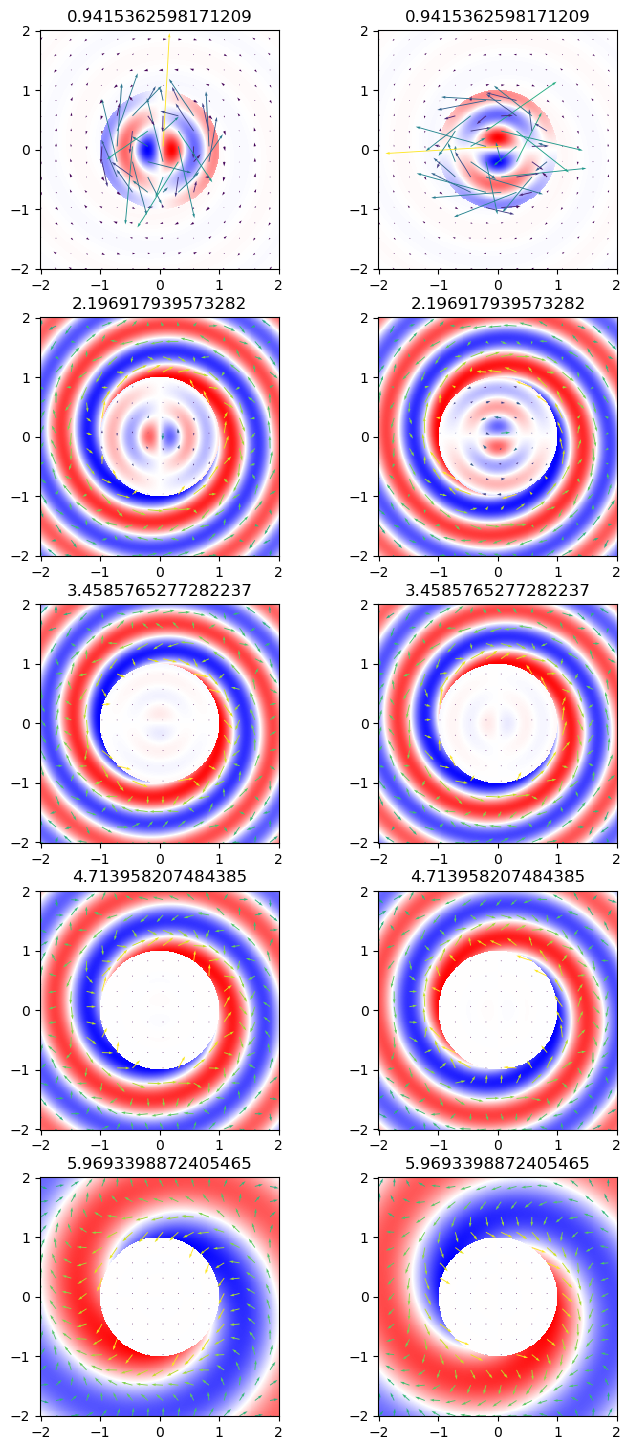

In [7]:
fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(8,18))
i=0
step=int(N/15)
z0=0
dxi=np.linspace(1,3,5,dtype=int)

for i in range(5):
# idx in [np.argwhere(r0_per_λ0>.7)[0][0],np.argwhere(r0_per_λ0>0.8)[0][0],np.argwhere(r0_per_λ0>0.9)[0][0],np.argwhere(r0_per_λ0<1)[-1][0],np.argwhere(r0_per_λ0<2)[-1][0]]:
    # idx=np.argwhere(r0_per_λ0>(0.975+.0125*i))[0][0]
    idx=int(np.argwhere(r0_per_λ0==find_nearest(r0_per_λ0,.15+.2*i)))
    

    E=fields.E(V[idx],r0_per_λ0[idx],n[idx],X,Y,z0)
    H=fields.H(V[idx],r0_per_λ0[idx],n[idx],X,Y,z0)
    mE=np.sqrt(np.abs(E[0])**2+np.abs(E[1])**2)
    mH=np.sqrt(np.abs(H[0])**2+np.abs(H[1])**2)

    # print(E[2])
    
    ax[i,0].pcolormesh(X,Y,(np.real(E[2])),cmap='bwr')
    ax[i,1].pcolormesh(X,Y,(np.real(H[2])),cmap='bwr')    
    ax[i,0].quiver(X[::step,::step],Y[::step,::step],np.real(E[0][::step,::step]),np.real(E[1][::step,::step]),mE[::step,::step])
    ax[i,1].quiver(X[::step,::step],Y[::step,::step],np.real(H[0][::step,::step]),np.real(H[1][::step,::step]),mH[::step,::step])
    ax[i,0].set_aspect('equal')
    ax[i,1].set_aspect('equal')
    ax[i,0].set_title(f'{2*np.pi*r0_per_λ0[idx]}')
    ax[i,1].set_title(f'{2*np.pi*r0_per_λ0[idx]}')
    

    # ax[i,2].set_aspect('equal')
    # ax[i,3].set_aspect('equal')
    # ax[i,2].set_title(f'{r0_per_λ0[idx]}')
    # ax[i,3].set_title(f'{r0_per_λ0[idx]}')

plt.show()

(-0.5214030002596749+0.14105197476931702j)
(-0.5640285389569958+0.3316858112372297j)
(-0.797191209806761+1.4462635908436579j)


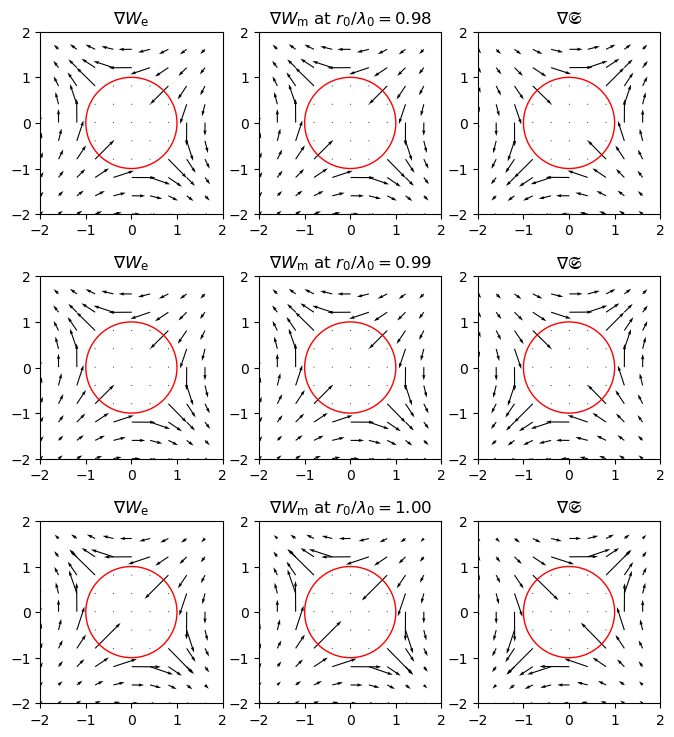

In [8]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(8,9))
i=0
step=int(N/10)
z0=2
# dxi=np.linspace(1,3,5,dtype=int)

for i in range(3):
# idx in [np.argwhere(r0_per_λ0>.7)[0][0],np.argwhere(r0_per_λ0>0.8)[0][0],np.argwhere(r0_per_λ0>0.9)[0][0],np.argwhere(r0_per_λ0<1)[-1][0],np.argwhere(r0_per_λ0<2)[-1][0]]:
    # idx=np.argwhere(r0_per_λ0>(0.975+.0125*i))[0][0]
    idx=int(np.argwhere(r0_per_λ0==find_nearest(r0_per_λ0,0.975+.0125*i)))
    E=fields.E(V[idx],r0_per_λ0[idx],n[idx],X,Y,z0)
    H=fields.H(V[idx],r0_per_λ0[idx],n[idx],X,Y,z0)
    
    mE=np.sqrt(np.abs(E[0])**2+np.abs(E[1])**2)
    mH=np.sqrt(np.abs(H[0])**2+np.abs(H[1])**2)
    dWe=np.gradient(np.conj(E[0])*E[0]+np.conj(E[1])*E[1]+np.conj(E[2])*E[2])
    dWm=np.gradient(np.conj(H[0])*H[0]+np.conj(H[1])*H[1]+np.conj(H[2])*H[2])
    dWc=np.gradient(np.imag(np.conj(E[0])*H[0]+np.conj(E[1])*H[1]+np.conj(E[2])*H[2]))

    # ax[i,0].pcolormesh(X,Y,dWe[2],cmap='bwr')
    # ax[i,1].pcolormesh(X,Y,dWm[2],cmap='bwr')    
    ax[i,0].quiver(X[::step,::step],Y[::step,::step],(dWe[0][::step,::step]),(dWe[1][::step,::step]),  lw=1)
    ax[i,1].quiver(X[::step,::step],Y[::step,::step],(dWm[0][::step,::step]),(dWm[1][::step,::step]),  lw=1)
    ax[i,2].quiver(X[::step,::step],Y[::step,::step],(dWc[0][::step,::step]),(dWc[1][::step,::step]),  lw=1)
    circle=plt.Circle((0, 0), 1, color='r',fill=False);    ax[i,0].add_artist(circle)
    circle=plt.Circle((0, 0), 1, color='r',fill=False);    ax[i,1].add_artist(circle)
    circle=plt.Circle((0, 0), 1, color='r',fill=False);    ax[i,2].add_artist(circle)
    ax[i,0].set_aspect('equal')
    ax[i,1].set_aspect('equal')
    ax[i,2].set_aspect('equal')
    ax[i,0].set_title(f'$\\nabla W_\\mathrm{{e}}$')
    ax[i,1].set_title(f'$\\nabla W_\\mathrm{{m}}$ at $r_0/\lambda_0=${r0_per_λ0[idx]:.2f}')
    ax[i,2].set_title(f'$\\nabla \\mathfrak{{S}}$')
    ax[i,0].set_xlim(-2,2);ax[i,0].set_ylim(-2,2)
    ax[i,1].set_xlim(-2,2);ax[i,1].set_ylim(-2,2)
    ax[i,2].set_xlim(-2,2);ax[i,2].set_ylim(-2,2)

plt.show()

(-0.11645915756204177-0.5274410041758737j)
(-0.4253851096855267-0.49718324448023693j)
(-1.6424387784166647-0.17200889031190128j)


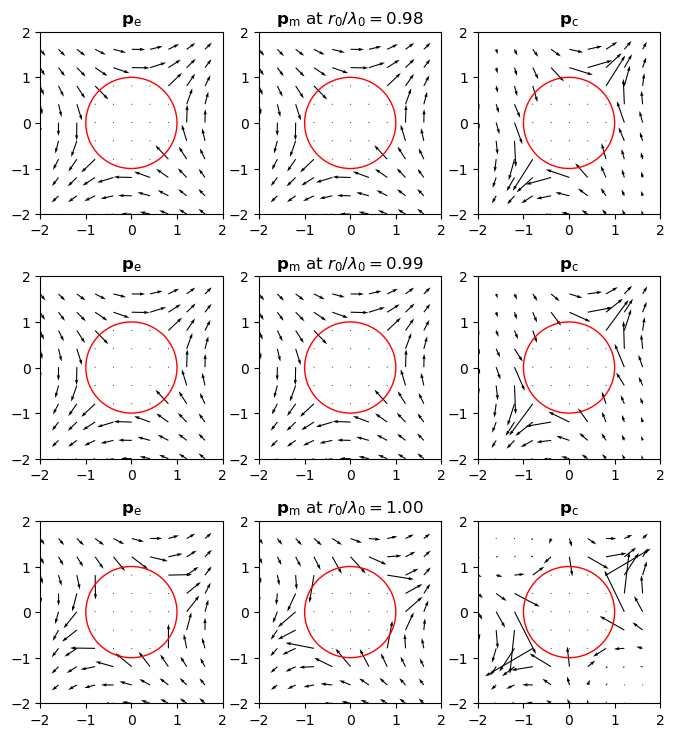

In [9]:
# m=2
# N=250
# x=np.linspace(-m,m,int(N))
# y=np.linspace(-m,m,int(N))
# z=np.linspace(-m,m,int(N))
# X, Y, Z= np.meshgrid(x, y, z)
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(8,9))
i=0
step=int(N/10)
z0=0
# dxi=np.linspace(1,3,5,dtype=int)

for i in range(3):
# idx in [np.argwhere(r0_per_λ0>.7)[0][0],np.argwhere(r0_per_λ0>0.8)[0][0],np.argwhere(r0_per_λ0>0.9)[0][0],np.argwhere(r0_per_λ0<1)[-1][0],np.argwhere(r0_per_λ0<2)[-1][0]]:
    # idx=np.argwhere(r0_per_λ0>(0.975+.0125*i))[0][0]
    idx=int(np.argwhere(r0_per_λ0==find_nearest(r0_per_λ0,0.975+.0125*i)))
    E=fields.E(V[idx],r0_per_λ0[idx],n[idx],X,Y,z0)
    H=fields.H(V[idx],r0_per_λ0[idx],n[idx],X,Y,z0)
    mE=np.sqrt(np.abs(E[0])**2+np.abs(E[1])**2)
    mH=np.sqrt(np.abs(H[0])**2+np.abs(H[1])**2)
    pe=np.imag(np.conj(E[0])*np.gradient(E[0])+np.conj(E[1])*np.gradient(E[1])+np.conj(E[2])*np.gradient(E[2]))
    pm=np.imag(np.conj(H[0])*np.gradient(H[0])+np.conj(H[1])*np.gradient(H[1])+np.conj(H[2])*np.gradient(H[2]))
    pc=np.imag(np.conj(E[0])*np.gradient(H[0])+np.conj(E[1])*np.gradient(H[1])+np.conj(E[2])*np.gradient(H[2])
               -np.conj(H[0])*np.gradient(E[0])+np.conj(H[1])*np.gradient(E[1])+np.conj(H[2])*np.gradient(E[2]))

    # ax[i,0].pcolormesh(X,Y,pe[2],cmap='bwr')
    # ax[i,1].pcolormesh(X,Y,pm[2],cmap='bwr') 
    # ax[i,2].pcolormesh(X,Y,pc[2],cmap='bwr')    
    ax[i,0].quiver(X[::step,::step],Y[::step,::step],(pe[0][::step,::step]),(pe[1][::step,::step]),  lw=1)
    ax[i,1].quiver(X[::step,::step],Y[::step,::step],(pm[0][::step,::step]),(pm[1][::step,::step]),  lw=1)
    ax[i,2].quiver(X[::step,::step],Y[::step,::step],(pc[0][::step,::step]),(pc[1][::step,::step]),  lw=1)
    circle=plt.Circle((0, 0), 1, color='r',fill=False);    ax[i,0].add_artist(circle)
    circle=plt.Circle((0, 0), 1, color='r',fill=False);    ax[i,1].add_artist(circle)
    circle=plt.Circle((0, 0), 1, color='r',fill=False);    ax[i,2].add_artist(circle)
    ax[i,0].set_aspect('equal')
    ax[i,1].set_aspect('equal')
    ax[i,2].set_aspect('equal')
    ax[i,0].set_title(f'$\\mathbf{{p}}_\mathrm{{e}}$')
    ax[i,1].set_title(f'$\\mathbf{{p}}_\mathrm{{m}}$ at $r_0/\lambda_0=${r0_per_λ0[idx]:.2f}')
    ax[i,2].set_title(f'$\\mathbf{{p}}_\mathrm{{c}}$')
    ax[i,0].set_xlim(-2,2);ax[i,0].set_ylim(-2,2)
    ax[i,1].set_xlim(-2,2);ax[i,1].set_ylim(-2,2)
    ax[i,2].set_xlim(-2,2);ax[i,2].set_ylim(-2,2)

plt.show()

In [10]:
# fig, ax = plt.subplots(nrows=5,ncols=4,figsize=(15,15))
# i=0
# step=int(N/15)
# z0=2
# dxi=np.linspace(1,3,5,dtype=int)

# for i in range(5):
# # idx in [np.argwhere(r0_per_λ0>.7)[0][0],np.argwhere(r0_per_λ0>0.8)[0][0],np.argwhere(r0_per_λ0>0.9)[0][0],np.argwhere(r0_per_λ0<1)[-1][0],np.argwhere(r0_per_λ0<2)[-1][0]]:
#     idx=np.argwhere(r0_per_λ0>(0.4+.2*i))[0][0]

#     E=fields.E(V[idx],r0_per_λ0[idx],n[idx],X,Y,z0)
#     H=fields.H(V[idx],r0_per_λ0[idx],n[idx],X,Y,z0)
#     mE=np.sqrt(np.abs(E[0])**2+np.abs(E[1])**2)
#     mH=np.sqrt(np.abs(H[0])**2+np.abs(H[1])**2)
    
#     ax[i,0].pcolormesh(X,Y,(np.real(E[2])),cmap='bwr')
#     ax[i,1].pcolormesh(X,Y,(np.real(H[2])),cmap='bwr')
#     ax[i,0].set_aspect('equal')
#     ax[i,1].set_aspect('equal')
#     ax[i,0].set_title(f'{r0_per_λ0[idx]}')
#     ax[i,1].set_title(f'{r0_per_λ0[idx]}')
    
#     ax[i,2].quiver(X[::step,::step],Y[::step,::step],np.real(E[0][::step,::step]),np.real(E[1][::step,::step]),mE[::step,::step],cmap='Blues')
#     ax[i,3].quiver(X[::step,::step],Y[::step,::step],np.real(H[0][::step,::step]),np.real(H[1][::step,::step]),mH[::step,::step],cmap='Reds')
#     ax[i,2].set_aspect('equal')
#     ax[i,3].set_aspect('equal')
#     ax[i,2].set_title(f'{r0_per_λ0[idx]}')
#     ax[i,3].set_title(f'{r0_per_λ0[idx]}')

# plt.show()

In [11]:
# for i in [np.argwhere(r0_per_λ0>.7)[0][0],np.argwhere(r0_per_λ0>0.8)[0][0],np.argwhere(r0_per_λ0>0.9)[0][0],np.argwhere(r0_per_λ0<1)[-1][0],np.argwhere(r0_per_λ0<2)[-1][0]]:
#     print(V[i])

In [12]:
# index=np.argwhere(r0_per_λ0>1.6)[0]
# print(V[index])
# print(fields.A(n[index],r0_per_λ0[index]))
# print(np.shape(V[index][0]))
# print(np.shape(fields.A(n[index],r0_per_λ0[index])[:,:,0]))
# print(np.matmul(fields.A(n[index],r0_per_λ0[index])[:,:,0],V[index][0]))

In [13]:
# fields.null_space(
#     np.matrix(fields.A(n[index],r0_per_λ0[index])[:,:,0]),rcond=1e-2)

In [14]:
# g=np.zeros_like(r0_per_λ0)
# for idx in range(len(r0_per_λ0)):
#     M=np.matrix(fields.A(n[idx],r0_per_λ0[idx]))
#     V=fields.null_space(M,rcond=1e-5)
#     # print(np.shape(V))
#     if np.shape(V)==(4,1): #print('One')
#         print(V)
#     elif np.shape(V)==(4,2): #print('Two')
#         print(V[:, 0])
#     else: print('No')
#     g[idx]=np.shape(V[0])[0]
#     # print(np.shape(np.split(V,1)),np.shape(V))
#     # print(type(V[0]))
#     # print(np.shape(V) )
# plt.plot(r0_per_λ0,g)    
# # plt.plot(r0_per_λ0,n*g) 
# plt.plot()

In [15]:
# x = np.array([[ 5.01667737e-08-0.00000000e+00j, -1.34829208e-06-0.00000000e+00j],
#  [ 1.19114008e-22+3.70020444e-07j,  0.00000000e+00+1.19778467e-06j],
#  [ 7.98237712e-01-2.39815454e-16j,  6.02342557e-01-2.93085785e-17j],
#  [ 1.59342607e-16+6.02342557e-01j, -1.52778058e-17-7.98237712e-01j]])

# print(x[:, 0])

In [16]:
# plt.plot(r0_per_λ0,n)

In [17]:
# idx=900
# # fields.null_space(fields.A(n[idx],r0_per_λ0[idx]))
# def nullspace(A, atol=1e-13, rtol=0):
#     A = np.atleast_2d(A)
#     u, s, vh = np.linalg.svd(A)
#     tol = max(atol, rtol * s[0])
#     nnz = (s >= tol).sum()
#     ns = vh[nnz:].conj().T
#     return ns
# # nullspace(fields.A(n[idx],r0_per_λ0[idx]),rtol=1e-8)
# np.shape(fields.null_space(fields.A(n[idx],r0_per_λ0[idx]),rcond=1e-8).flatten())
# # np.linalg.svd(fields.A(n[idx],r0_per_λ0[idx]))

In [18]:
# fields.null_space(np.array([[2,3,5],[-4,2,3],[0,0,0]]))

In [19]:
# with np.printoptions(threshold=np.inf): print(V)

In [20]:
# ix=500
# print(np.abs(np.matmul(M[ix],v[ix][0])))
# print(np.abs(np.matmul(M[ix],v[ix][1])))
# print(np.abs(np.matmul(M[ix],v[ix][2])))
# print(np.abs(np.matmul(M[ix],v[ix][3])))

# with np.printoptions(threshold=np.inf): print(M[ix].dtype)
# with np.printoptions(threshold=np.inf): print(w[ix])
# with np.printoptions(threshold=np.inf): print(v[ix])

# print(W[ix])


In [21]:
# np.shape(dWe)

In [22]:
# np.shape(np.conj(E[0])*E[0])

In [23]:
# λ0=189e-9;r0=250e-9
# x=2*r0*np.linspace(-1,1)
# y=2*r0*np.linspace(-1,1)
# z=2*r0*np.linspace(-1,1)
# X, Y, Z = np.meshgrid(x, y, z)

# # E=fields.E(V[io],r0_per_λ0[io],n[io],X,Y,Z)
# (E,H,kz)=fields.get(x,y,z,n_in=1.45,n_out=1,rmin=0,rmax=2,neff_samples=250)


In [24]:
# le=2;Ml=10
# x=le*np.linspace(-1,1,Ml)
# y=le*np.linspace(-1,1,Ml)
# z=le*np.linspace(-1,1,Ml)
# X, Y, Z = np.meshgrid(x, y, z)
# idx=np.argwhere(r0_per_λ0>(0.4+.2*3))[0][0]
# E=fields.E(V[idx],r0_per_λ0[idx],n[idx],X,Y,Z)
# H=fields.H(V[idx],r0_per_λ0[idx],n[idx],X,Y,Z)
# dWe=np.gradient(np.conj(E[0])*E[0]+np.conj(E[1])*E[1]+np.conj(E[2])*E[2])
# dWm=np.gradient(np.conj(H[0])*H[0]+np.conj(H[1])*H[1]+np.conj(H[2])*H[2])
# dWc=np.gradient(np.imag(np.conj(E[0])*H[0]+np.conj(E[1])*H[1]+np.conj(E[2])*H[2]))

In [25]:
# fig1 = plt.figure(figsize=(8,8))
# ax1 = fig1.add_subplot(111,projection='3d')
# ax1.quiver(X,Y,Z,(dWc[0]),(dWc[1]),(dWc[2]), length=10, lw=1)
# us = np.linspace(0, 2 * np.pi, 32)
# zs = np.linspace(-2, 2, 2)
# us, zs = np.meshgrid(us, zs)
# xs = 1 * np.cos(us)
# ys = 1 * np.sin(us)
# ax1.plot_surface(xs, ys, zs,alpha=.5,rstride=1,cstride=3)

# plt.show()

In [26]:
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt

# %matplotlib notebook

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # load some test data for demonstration and plot a wireframe
# X, Y, Z = axes3d.get_test_data(0.1)
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# # rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

In [27]:
np.abs(n - 1.25).argmin()

401

In [28]:
# V=np.zeros([len(r0_per_λ0),4],dtype=complex)
# W=np.zeros_like(r0_per_λ0,dtype=complex)
# for i in range(len(r0_per_λ0)):
#     (w,v)=np.linalg.eig(fields.A(n[i],r0_per_λ0[i]))
#     W[i]=np.min(np.abs(w))
#     V[i,:]=v[np.argmin(np.abs(w))]

In [29]:
# N=1000
# rmin=0
# rmax=2



# r0_per_λ0=np.linspace(rmin,rmax,N+1,endpoint=False)[1:]
# neff=np.linspace(fields.n2,fields.n1,N+1,endpoint=False)[1:]
# Ro, Ne = np.meshgrid(r0_per_λ0, neff)
# logdetM=fields.logdetA(Ne,Ro)


In [30]:
# n=np.zeros_like(r0_per_λ0)
# for i in range(len(r0_per_λ0)):
#     try:
#         n[i]=neff[np.max(signal.find_peaks(-logdetM[:,i])[0])]
#     except ValueError:  #raised if `y` is empty.
#         n[i]=0
    

In [31]:
# plt.pcolormesh(Ro,Ne,-logdetM,cmap='Greys')
# plt.xlim(xmax=rmax,xmin=rmin) 
# plt.plot(r0_per_λ0,n,label=r'$n_\mathrm{eff}(r_0/\lambda_0)$')
# plt.ylim(fields.n2,fields.n1)
# plt.colorbar(label=r'$-\log_{10}|\det{M}|$')
# # plt.clim(vmin=0) 
# plt.grid(color='black', linestyle='--')
# plt.ylabel(r'$n_\mathrm{eff}=\lambda_0/\lambda_z$')
# plt.xlabel(r'$k_0r_0/2\pi=r_0/\lambda_0$')
# plt.legend()
# plt.show()

In [32]:
# plt.plot(r0_per_λ0,(fields.logdetA(n,r0_per_λ0)),label=r'$\log_{10}|\det{M}|$')
# plt.plot(r0_per_λ0,np.log10(W),label=r'$\log_{10}$ of min eigenvalue')
# # plt.xlim(xmax=xmax,xmin=xmin) 
# plt.ylim(ymax=0)#,ymin=-35) 
# plt.axhline(y=-3)
# plt.legend()
# plt.grid(color='black', linestyle='--')
# plt.show()

In [33]:
# nu=0
# plt.plot(-Z[:,nu])
# for i in signal.find_peaks(-Z[:,nu], prominence=0)[0]:
#     plt.axvline(x=i)
 
# y[signal.find_peaks(Z[:,nu])[0][0]]

$$
\left(\begin{array}{cccc}
n_2 J_{1}(\kappa_1r_0) & 0 & - n_1H_{1}^{(1)} (\kappa_2r_0)& 0 \\
n_2 \frac{\beta}{\kappa_1^2 r_0} J_{1}(\kappa_1r_0) & \mathrm{i} n_2 \frac{k_1}{\kappa_1} J_{1}^{\prime}(\kappa_1r_0) & - n_1\frac{\beta}{\kappa_2^2 r_0} H_{1}^{(1)}(\kappa_2r_0) & -\mathrm{i}  n_1\frac{k_2}{\kappa_2} H_{1}^{(1)^{\prime}} (\kappa_2r_0)\\
0 & J_{1}(\kappa_1r_0) & 0 & -H_{1}^{(1)}(\kappa_2r_0) \\
-\mathrm{i} \frac{k_1}{\kappa_1} J_{1}^{\prime}(\kappa_1r_0) & \frac{\beta}{\kappa_1^2 r_0} J_{1}(\kappa_1r_0) & \mathrm{i} \frac{k_2}{\kappa_2} H_{1}^{(1)^{\prime}}(\kappa_2r_0) & -\frac{\beta}{\kappa_2^2 r_0} H_l^{(1)}(\kappa_2r_0)
\end{array}\right)
$$

$$
\left(\begin{array}{cccc}
\sqrt{\varepsilon_2} J_{\ell} & 0 & - \sqrt{\varepsilon_1}H_{\ell}^{(1)} & 0 \\
\sqrt{\varepsilon_2} \frac{\ell \beta}{\kappa_1^2 r_0} J_{\ell} & \mathrm{i} \sqrt{\varepsilon_2} \frac{k_1}{\kappa_1} J_{\ell}^{\prime} & - \sqrt{\varepsilon_1}\frac{\ell \beta}{\kappa_2^2 r_0} H_{\ell}^{(1)} & -\mathrm{i}  \sqrt{\varepsilon_1}\frac{k_2}{\kappa_2} H_{\ell}^{(1)^{\prime}} \\
0 & J_{\ell} & 0 & -H_{\ell}^{(1)} \\
-\mathrm{i} \frac{k_1}{\kappa_1} J_{\ell}^{\prime} & \frac{\ell \beta}{\kappa_1^2 r_0} J_{\ell} & \mathrm{i} \frac{k_2}{\kappa_2} H_{\ell}^{(1)^{\prime}} & -\frac{\ell \beta}{\kappa_2^2 r_0} H_l^{(1)}
\end{array}\right)
$$
$$\kappa_i=\sqrt{k^2_i-\beta^2}$$

In [34]:
# f=np.zeros_like(x)
# for i in range(len(x)-i0):
#     f[-i]=optimize.fmin(func=lambda l:-np.abs(fields.logdetA(l,x[-i])),x0=g[-i],disp=0)


In [35]:
# f=np.zeros_like(x)
# g=np.zeros_like(x)
# h=np.zeros_like(x)
# x1=1
# x2=1.45
# i0=0#*np.argwhere(x>.6)[0][0]-1
# for i in range(i0,len(x)):
#     h[i]=y[signal.find_peaks(-Z[:,i])[0][-1]]
#     # g[i]=optimize.fmin(func=lambda l:-np.abs(fields.logdetA(l,x[i])),x0=h[i],disp=0)
#     # f[i]=optimize.fminbound(func=lambda l:-np.abs(fields.logdetA(l,x[i])), x1=x1, x2=x2)
#     # x1=f[i]
# # for i in range(bre):
# #     f[i]=None
# # np.argmax(np.diff(f))

In [36]:
# (w,v)=np.linalg.eig(fields.M(g[1000],x[1000]))
# np.min(np.abs(w))
# v[np.argmin(np.abs(w))]

In [37]:
# np.shape((v[np.argmin(np.abs(w))],v[np.argmin(np.abs(w))]))

In [38]:
# np.zeros([len(x),4])[0,:]

In [39]:
# plt.plot(x,np.log(W))
# plt.plot(x,(fields.logdetA(h,x)),label=r'$\log_{10}|\det{M}|$')
# plt.legend()
# plt.grid(color='black', linestyle='--')
# plt.show()

\begin{aligned}
\sqrt{\varepsilon}E^{ \pm} & =-\frac{i}{ \kappa}( \pm \beta A+i k B) J_{\ell \mp 1}(\rho) e^{i(\ell \mp 1) \varphi+i \beta z}, \\
\sqrt{\mu}H^{ \pm} & =-\frac{i}{ \kappa}( \pm \beta B-i k A) J_{\ell \mp 1}(\rho) e^{i(\ell \mp 1) \varphi+i \beta z}, \\
\sqrt{\varepsilon}E_z & =\sqrt{{2}} A J_{\ell}(\rho) e^{i \ell \varphi+i \beta z}, \quad \sqrt{{\mu}}H_z=\sqrt{{2}} B J_{\ell}(\rho) e^{i \ell \varphi+i \beta z} .
\end{aligned}
$$\kappa=\sqrt{k^2-\beta^2}, \rho=\kappa r$$

\begin{aligned}
\sqrt{\varepsilon}E^{ \pm} & =-\frac{\mathrm{i}}{ \sqrt{n^2-n_\mathrm{eff}^2}}( \pm n_\mathrm{eff} A+\mathrm{i}n B) J_{\ell \mp 1}\left( \sqrt{n^2-n_\mathrm{eff}^2}\frac{2\pi r}{\lambda_0}\right) e^{\mathrm{i}(\ell \mp 1) \varphi+\mathrm{i} n_\mathrm{eff}\frac{2\pi z}{\lambda_0}}, \\
\sqrt{\mu}H^{ \pm} & =-\frac{\mathrm{i}}{ \sqrt{n^2-n_\mathrm{eff}^2}}( \pm n_\mathrm{eff} B-\mathrm{i} n A) J_{\ell \mp 1}\left( \sqrt{n^2-n_\mathrm{eff}^2}\frac{2\pi r}{\lambda_0}\right) e^{\mathrm{i}(\ell \mp 1) \varphi+\mathrm{i} n_\mathrm{eff}\frac{2\pi z}{\lambda_0}}, \\
\sqrt{\varepsilon}E_z & =\sqrt{{2}} A J_{\ell}\left( \sqrt{n^2-n_\mathrm{eff}^2}\frac{2\pi r}{\lambda_0}\right) e^{i \ell \varphi+i \beta z}, \quad \sqrt{{\mu}}H_z=\sqrt{{2}} B J_{\ell}\left( \sqrt{n^2-n_\mathrm{eff}^2}\frac{2\pi r}{\lambda_0}\right) e^{i \ell \varphi+i \beta z} .
\end{aligned}

$$n_\mathrm{eff}=\frac{k_z}{k_0}=\frac{\lambda_0}{\lambda_z},\quad n=\frac{k}{k_0},\quad \kappa=k_0\sqrt{n^2-n_\mathrm{eff}^2}$$
$$k_z z=n_\mathrm{eff}\frac{2\pi z}{\lambda_0}$$
$$k_0r=\frac{2\pi r}{\lambda_0}=\frac{2\pi r}{r_0}\frac{r_0}{\lambda_0}$$

For $\ell=1$ we have
\begin{aligned}
\sqrt{\varepsilon}E^{ \pm} & =-\frac{\mathrm{i}}{ \sqrt{n^2-n_\mathrm{eff}^2}}( \pm n_\mathrm{eff} A+\mathrm{i} nB) J_{1 \mp 1}\left( \sqrt{n^2-n_\mathrm{eff}^2}\frac{2\pi r}{\lambda_0}\right) e^{\mathrm{i}(1\mp 1) \varphi+\mathrm{i} n_\mathrm{eff}\frac{2\pi z}{\lambda_0}}, \\
\sqrt{\mu}H^{ \pm} & =-\frac{\mathrm{i}}{ \sqrt{n^2-n_\mathrm{eff}^2}}( \pm n_\mathrm{eff} B-\mathrm{i} nA) J_{1 \mp 1}\left( \sqrt{n^2-n_\mathrm{eff}^2}\frac{2\pi r}{\lambda_0}\right) e^{\mathrm{i}(1 \mp 1) \varphi+\mathrm{i} n_\mathrm{eff}\frac{2\pi z}{\lambda_0}}, \\
\sqrt{\varepsilon}E_z & =\sqrt{{2}} A J_{1}\left( \sqrt{n^2-n_\mathrm{eff}^2}\frac{2\pi r}{\lambda_0}\right) e^{i  \varphi+\mathrm{i} n_\mathrm{eff}\frac{2\pi z}{\lambda_0}}, \quad \sqrt{{\mu}}H_z=\sqrt{{2}} B J_{1}\left( \sqrt{n^2-n_\mathrm{eff}^2}\frac{2\pi r}{\lambda_0}\right) e^{i \varphi+\mathrm{i} n_\mathrm{eff}\frac{2\pi z}{\lambda_0}} .
\end{aligned}

In [40]:
# idx=105
# x[idx]

In [41]:
# V[idx]

In [42]:
# np.arctan2(0, 0)

In [43]:
# fields.H(V[idx],x[idx],h[idx],0.1,0,0)

In [44]:
# iZ0=(fields.E(V[idx],x[idx],h[idx],iX,iY,0)[0])
# iZ1=(fields.E(V[idx],x[idx],h[idx],iX,iY,0)[1])
# iZ2=(fields.E(V[idx],x[idx],h[idx],iX,iY,0)[2])
# iE=np.sqrt(np.abs(iZ0)**2+np.abs(iZ1)**2)
# iH0=(fields.H(V[idx],x[idx],h[idx],iX,iY,0)[0])
# iH1=(fields.H(V[idx],x[idx],h[idx],iX,iY,0)[1])
# iH2=(fields.H(V[idx],x[idx],h[idx],iX,iY,0)[2])
# iH=np.sqrt(np.abs(iH0)**2+np.abs(iH1)**2)
    

In [45]:
# fig, ax = plt.subplots(ncols=2)
# mE=ax[0].pcolormesh(iX,iY,(iE),cmap='Blues')
# mH=ax[1].pcolormesh(iX,iY,(iH),cmap='Reds')
# ax[0].set_aspect('equal')
# ax[1].set_aspect('equal')
# # mE.set_clim(vmax=2,vmin=0) 
# # mH.set_clim(vmax=2,vmin=0) 
# # fig.colorbar(mE, orientation='horizontal', ax=ax.ravel().tolist())
# fig.colorbar(mE, orientation='horizontal')
# plt.colorbar(mH, orientation='horizontal')
# plt.show()

In [46]:
# fig, ax = plt.subplots(ncols=2)
# mE=ax[0].pcolormesh(iX,iY,np.log10(iE),cmap='Blues')
# mH=ax[1].pcolormesh(iX,iY,np.log10(iH),cmap='Reds')
# ax[0].set_aspect('equal')
# ax[1].set_aspect('equal')
# # mE.set_clim(vmax=2,vmin=0) 
# # mH.set_clim(vmax=2,vmin=0) 
# # fig.colorbar(mE, orientation='horizontal', ax=ax.ravel().tolist())
# fig.colorbar(mE, orientation='horizontal')
# plt.colorbar(mH, orientation='horizontal')
# plt.show()

In [47]:
# fig, ax = plt.subplots(ncols=2)
# mE=ax[0].pcolormesh(iX,iY,(np.real(iZ2)),cmap='bwr')
# mH=ax[1].pcolormesh(iX,iY,(np.real(iH2)),cmap='bwr')
# ax[0].set_aspect('equal')
# ax[1].set_aspect('equal')
# # mE.set_clim(vmax=2,vmin=0) 
# # mH.set_clim(vmax=2,vmin=0) 
# # fig.colorbar(mE, orientation='horizontal', ax=ax.ravel().tolist())
# fig.colorbar(mE, orientation='horizontal')
# plt.colorbar(mH, orientation='horizontal')
# plt.show()

In [48]:
# plt.pcolormesh(iX,iY,(np.real(iH2)),cmap='bwr')
# plt.gca().set_aspect('equal')
# plt.colorbar(orientation='horizontal')
# # plt.clim(vmax=.3,vmin=-.3) 
# plt.show()

In [49]:
# plt.pcolormesh(iX,iY,(np.real(iZ2)),cmap='bwr')
# plt.gca().set_aspect('equal')
# plt.colorbar(orientation='horizontal')
# # plt.clim(vmax=.000001,vmin=-.000001) 
# plt.show()

In [50]:
# fig, ax = plt.subplots(ncols=2,figsize=(20,20))
# mE=ax[0].quiver(iX,iY,np.real(iZ0),np.real(iZ1),iE,cmap='Blues')
# mH=ax[1].quiver(iX,iY,np.real(iH0),np.real(iH1),iH,cmap='Reds')
# ax[0].set_aspect('equal')
# ax[1].set_aspect('equal')
# # mE.set_clim(vmax=2,vmin=0) 
# # mH.set_clim(vmax=2,vmin=0) 
# # fig.colorbar(mE, orientation='horizontal', ax=ax.ravel().tolist())
# fig.colorbar(mE, orientation='horizontal')
# plt.colorbar(mH, orientation='horizontal')
# plt.show()

In [51]:
# plt.quiver(iX,iY,np.real(iZ0),np.real(iZ1),iE,cmap='Blues')
# plt.gca().set_aspect('equal')
# plt.colorbar(orientation='horizontal')
# plt.show()

In [52]:
# [int(N/4),int(N/2),int(3*N/4)]